In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D

# matplotlib style
style_name = 'bmh' #bmh
mpl.style.use(style_name)
style = plt.style.library[style_name]
style_colors = [ c['color'] for c in style['axes.prop_cycle'] ]

# matplotlib 한글출력
# plt.rcParams['font.family'] = 'NanumBarunGothic'
# mpl.rc('font', family='NanumBarunGothic')
# plt.rcParams['axes.unicode_minus'] = False

np.set_printoptions(precision=4, linewidth =150)

##########################################################
# for sklearn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

##########################################################
# for plotly
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
from IPython.core.display import display, HTML

init_notebook_mode(connected=True)

# https://github.com/plotly/plotly.py/issues/515
# The polling here is to ensure that plotly.js has already been loaded before
# setting display alignment in order to avoid a race condition.
display(HTML(
    '<script>'
        'var waitForPlotly = setInterval( function() {'
            'if( typeof(window.Plotly) !== "undefined" ){'
                'MathJax.Hub.Config({ SVG: { font: "STIX-Web" }, displayAlign: "center" });'
                'MathJax.Hub.Queue(["setRenderer", MathJax.Hub, "SVG"]);'
                'clearInterval(waitForPlotly);'
            '}}, 250 );'
    '</script>'
))

In [2]:
# 3주차에 만든 최적화 함수를 정의한 노트북 파일을 로드한다.
%run ../class-03/minimize.ipynb

## 특성 벡터 정규화<sup>feature scaling </sup>

- 본 문서에서는 9차 다항식 기저를 사용해서 스칼라 입력 $x$를 다음과 같은 10차 특성벡터로 만들 때 특성벡터의 정규화 효과를 실험해 본다. 

$$
x \to \text{9 degree polynomial basis} \to \mathbf{x} = \begin{bmatrix} x^0 \\ x^1 \\ x^2 \\ \vdots \\ x^9 \end{bmatrix}
$$

- 위처럼 특성 벡터를 만들 경우 $x$값이 1보다 크다면 마지막 특성은 9번 거듭제곱 되면서 엄청 큰 숫자가 되고 첫번째, 두번째 특징은 1근처의 값이 되어서 특성벡터 정규화가 필요하게 된다.

- 선형회귀에 사용했던 데이터와 같은 데이터를 사용해서 실험하나 여기서는 특성값이 커지게 하기 위해 데이터 $x$의 범위를 5까지 하였다.(범위를 0~1까지하면 모두 1보다 작은 값이 되서 9번 거듭제곱해도 수가 커지지 않아 정규화의 효과를 실험하기 좋지 않다.)

- 코드는 모두 동일하며 목적함수 내부에 특성을 표준화시키는 코드만 추가 되었다.

x_train:(9,)
t_train:(9,)


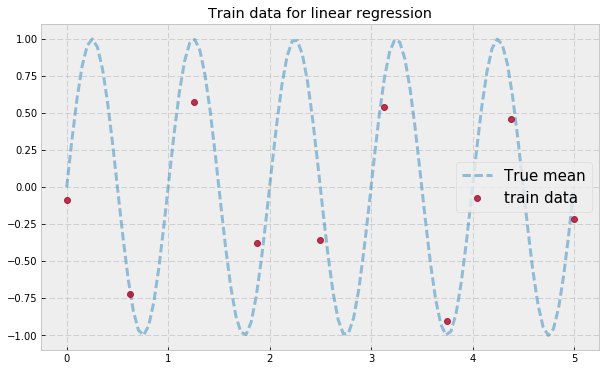

In [3]:
######################################################
# 회귀에 사용할 데이터를 준비
# 학습데이터와 테스트 데이트를 모두 준비
######################################################

plt.rcParams["figure.figsize"] = (10,6)

# 시드를 심어 항상 같은 결과가 나오게 한다.
np.random.seed(2)

# x범위는 0~1까지
x = np.linspace(0, 5, 100)
# 데이터가 생성되는 기준이 되는 함수
t = np.sin(2*np.pi*x)

N = 9
x_train = np.linspace(0, 5, N)
t_train = np.sin(2*np.pi*x_train) + (np.random.randn(N)/5)
print("x_train:{}".format(x_train.shape))
print("t_train:{}".format(t_train.shape))

plt.plot(x, t, '--', lw=3, alpha=0.5, label="True mean")
plt.plot(x_train, t_train, 'o', alpha=0.8, label="train data")
plt.title("Train data for linear regression")
plt.legend(fontsize=15)
plt.show()

[ -0.0834  -5.6896   3.7768  18.6311 -29.648   17.935   -5.3216   0.774   -0.0441]


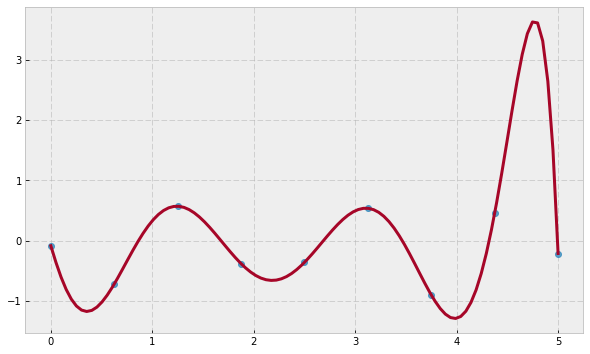

In [4]:
# 정규 방정식
M = 9
PI = np.hstack( (np.power(x_train.reshape(N,1), p) for p in range(M)) )
w_nonlin = np.linalg.solve(np.dot(PI.T, PI), np.dot(PI.T , t_train.reshape(N,1)) ).reshape(-1)
print(w_nonlin)

PI2 = np.hstack( (np.power(x.reshape(x.shape[0],1), p) for p in range(M)) )
y = (w_nonlin * PI2).sum(axis=1)
plt.plot(x_train, t_train, 'o', alpha=0.8)
plt.plot(x, y, lw=3, label="$M=${}".format(M))
plt.show()


- 아래 코드의 전역변수 <span class="code-body">feautre_scale</span>을 <span class="code-body">True, False</span>로 바꿔가면서 다음 조건하에서 실험함.

- 조건 : <span class="code-body">gradient data type=float64, eps=0.5e-5, max_iter=5000</span>

#### 특성 정규화를 한 경우
```
################################################################
# START OPTIMIZATION
################################################################
INIT POINT : [ 0.0976  0.4304  0.2055  0.0898 -0.1527  0.2918 -0.1248  0.7835  0.9273 -0.2331], dtype : float64
METHOD     : Conjugate gradient Fletcher-Reeves
##############
# START ITER.
##############
Iter:    1, |c|: 54.5029584, alpha:0.0132265, Cost:  1.3690602, d:[ -1.9595 -15.898  -17.7074 -18.4016 -18.658  -18.7063 -18.6494 -18.5394 -18.405  -18.2624], x:[ 0.0717  0.2201 -0.0287 -0.1536 -0.3995  0.0444 -0.3715  0.5383  0.6839 -0.4747]
Iter:  501, |c|:  0.0497149, alpha:0.0865347, Cost:  0.0041688, d:[ 1.2128e-02  9.0157e-01 -1.8329e+01  1.2639e+02 -4.0107e+02  5.9637e+02 -2.3085e+02 -4.3304e+02  5.4364e+02 -1.8395e+02], x:[-1.2260e-01 -1.9492e+01  2.4659e+02 -9.0245e+02  7.6591e+02  1.7892e+03 -2.8945e+03 -1.4080e+03  4.4244e+03 -2.0018e+03]
Iter: 1001, |c|:  0.0014158, alpha:0.0595240, Cost:  0.0001029, d:[ 0.0012 -0.0044 -0.0165  0.1521 -0.405   0.5035 -0.1291 -0.3655  0.3741 -0.1103], x:[-1.2007e-01 -1.5535e+01  1.7367e+02 -4.3398e+02 -6.4149e+02  3.7766e+03 -3.5863e+03 -2.8474e+03  6.1383e+03 -2.5640e+03]
Stop criterion break
Iter: 1232, |c|:  0.0000039, alpha:0.1099498, Cost:  0.0000064, d:[-5.5347e-06 -1.7126e-06 -2.3031e-06  5.4514e-06 -1.1941e-06  1.1543e-05 -1.5998e-06 -8.1647e-06  2.2647e-06 -4.3080e-06], x:[-1.2010e-01 -1.5277e+01  1.7021e+02 -4.1717e+02 -6.8156e+02  3.8235e+03 -3.5984e+03 -2.8808e+03  6.1756e+03 -2.5763e+03]
```

#### 특성 정규화를 안한 경우 
```
################################################################
# START OPTIMIZATION
################################################################
INIT POINT : [ 0.0976  0.4304  0.2055  0.0898 -0.1527  0.2918 -0.1248  0.7835  0.9273 -0.2331], dtype : float64
METHOD     : Conjugate gradient Fletcher-Reeves
##############
# START ITER.
##############
Iter:    1, |c|:57336097006.7369843, alpha:0.0000000, Cost:288630553.9093114, d:[6.4736e+03 6.2596e+04 4.2237e+05 2.5136e+06 1.4092e+07 7.6342e+07 4.0477e+08 2.1156e+09 1.0947e+10 5.6240e+10], x:[ 0.0976  0.4304  0.2055  0.0898 -0.1527  0.2918 -0.1247  0.784   0.9298 -0.2203]
Iter:  501, |c|:473.0517259, alpha:0.0000000, Cost:  0.6174912, d:[-571613.7301   87731.2308  460157.4146  262048.1863 -202751.2077 -292285.9899  300414.5552  -74765.1721    3580.3135     883.9836], x:[-0.2728  0.6386  0.4803 -0.0919 -0.811  -0.0234  0.5376 -0.2724  0.052  -0.0035]
Numerical unstable break : iter:  614, Cost_old:0.5587318, Cost_new:0.5587318
```

- 수치적으로 불안정해지면서 614 반복에서 중지

- 목적함수의 감소를 엄격하게 체크하지 않게 하고(<span class="code-body">strict=False</span>) 다시 실행하면

```
################################################################
# START OPTIMIZATION
################################################################
INIT POINT : [ 0.0976  0.4304  0.2055  0.0898 -0.1527  0.2918 -0.1248  0.7835  0.9273 -0.2331], dtype : float64
METHOD     : Conjugate gradient Fletcher-Reeves
##############
# START ITER.
##############
Iter:    1, |c|:57336097006.7369843, alpha:0.0000000, Cost:288630553.9093114, d:[6.4736e+03 6.2596e+04 4.2237e+05 2.5136e+06 1.4092e+07 7.6342e+07 4.0477e+08 2.1156e+09 1.0947e+10 5.6240e+10], x:[ 0.0976  0.4304  0.2055  0.0898 -0.1527  0.2918 -0.1247  0.784   0.9298 -0.2203]
Iter:  501, |c|:473.0517259, alpha:0.0000000, Cost:  0.6174912, d:[-571613.7301   87731.2308  460157.4146  262048.1863 -202751.2077 -292285.9899  300414.5552  -74765.1721    3580.3135     883.9836], x:[-0.2728  0.6386  0.4803 -0.0919 -0.811  -0.0234  0.5376 -0.2724  0.052  -0.0035]
Iter: 1001, |c|:  2.0696031, alpha:0.0000000, Cost:  0.4491213, d:[  7.4686 -18.959   14.5859  12.7015  -8.1317 -13.8221  14.9008  -1.9798   0.1202   0.3855], x:[-0.1623 -0.2665  1.4517  0.672  -1.3395 -0.874   1.4164 -0.5862  0.1018 -0.0065]
Iter: 1501, |c|:  1.5700640, alpha:0.0000000, Cost:  0.0480355, d:[  4.9609 -11.8054   6.9298   4.567   -8.2412 -10.3896   9.1068   0.5695   5.1563  -0.6361], x:[-0.1249 -4.3373  4.3471  3.5518 -2.4237 -3.4939  3.6419 -1.3007  0.2069 -0.0124]
Iter: 2001, |c|:18412.3209037, alpha:0.0000000, Cost:  0.0418089, d:[ 2.3342e+09 -6.0707e+08  1.6037e+09  1.0810e+09 -5.6754e+08 -5.3361e+08  1.8337e+09 -1.2699e+09  3.1706e+08 -2.6373e+07], x:[-0.0691 -4.3903  4.3754  3.5606 -2.4731 -3.5308  3.714  -1.3335  0.213  -0.0128]
Iter: 2501, |c|:4826.3958836, alpha:0.0000000, Cost:  0.0417902, d:[ 1.9194e+08 -1.5148e+07  1.2395e+08  6.6522e+07 -7.9830e+07 -1.1099e+08  6.9315e+07 -1.5915e+07  3.4244e+06 -4.2307e+05], x:[-0.0688 -4.3903  4.3756  3.5607 -2.4732 -3.5309  3.7142 -1.3336  0.213  -0.0128]
Iter: 3001, |c|:102.3734737, alpha:0.0000000, Cost:  0.0405616, d:[ 8.6505e+04 -6.6032e+03  5.6097e+04  3.0549e+04 -3.4636e+04 -4.7351e+04  3.5663e+04 -2.3975e+03 -2.2340e+03  1.7556e+01], x:[-0.0488 -4.3919  4.3885  3.5677 -2.4814 -3.5422  3.7219 -1.3346  0.2129 -0.0128]
Iter: 3501, |c|:584.7469167, alpha:0.0000000, Cost:  0.0402375, d:[ 2.8680e+06 -1.3877e+05  1.9466e+06  1.1844e+06 -8.4756e+05 -1.2209e+06  1.2811e+06 -4.6406e+05  5.3400e+04 -1.7510e+03], x:[-0.0433 -4.3922  4.3923  3.57   -2.4831 -3.5446  3.7243 -1.3355  0.213  -0.0128]
Iter: 4001, |c|: 18.7066118, alpha:0.0000000, Cost:  0.0388379, d:[ 2907.8551  -163.8079  1946.2093  1125.148  -1021.775  -1506.2758   944.7451  -787.2174   280.5097   -87.0876], x:[-0.019  -4.3933  4.4087  3.58   -2.4903 -3.555   3.7351 -1.3395  0.2137 -0.0128]
Iter: 4501, |c|:321.8927354, alpha:0.0000000, Cost:  0.0388325, d:[ 767813.9136 -114536.7449  446303.4109  116946.8245 -609748.9997 -790939.3957   76968.7099  -59331.2739  -22145.3809    5862.3949], x:[-0.0189 -4.3933  4.4088  3.58   -2.4903 -3.555   3.7352 -1.3395  0.2137 -0.0128]
max-iter break
Iter: 5000, |c|:482.2987845, alpha:0.0000000, Cost:  0.0388300, d:[ 1693137.3676  -274095.7055   973308.3722   232166.3487 -1360445.2134 -1625451.8534   631585.8825   593370.8467  -299431.2117    31043.9374], x:[-0.0188 -4.3933  4.4088  3.58   -2.4903 -3.5551  3.7352 -1.3395  0.2137 -0.0128]
```

- 그렇게 해도 5000번 반복안에 수렴하지 않음.

In [5]:
def E(w, M, x, t):
    """
    Error function
    E(w)= (1/2) * sum_{n=1}^{N} {y(x_n,w) - t_n}^2
    y(x_n, w) = w_0*x^0 + w_1*x^1 + w_2*x^2 + ... + w_M*x^M
    """
    X = np.array([ x**i for i in range(M+1) ])
    
    ###############################################################
    #여기서 피처스케일링
    if feautre_scale :
        mu = X.mean(axis=1).reshape(-1,1)
        mu[0] = 0
        X2 = X - mu

        sigma = X2.std(axis=1).reshape(-1,1)
        sigma[0] = 1
        X = X2 / sigma
    ###############################################################
    
    y = (w.reshape(-1,1) * X).sum(axis=0)
    
    return 0.5*(( (y - t)**2 ).sum())

In [9]:
# 피처스케일을 위한 전역변수
# 이 코드를 True, False로 바꾸면서 실험
feautre_scale = True

# 시드를 심어 항상 같은 결과가 나오게 한다.
np.random.seed(0)

M = 9
x0 = np.random.uniform(-1, 1, M+1)

w = minimize(E, x0, args=(M, x_train, t_train), strict=False,
             eps=0.5e-5, max_iter=5000, method="CGFR", verbose_step=500)

################################################################
# START OPTIMIZATION
################################################################
INIT POINT : [ 0.0976  0.4304  0.2055  0.0898 -0.1527  0.2918 -0.1248  0.7835  0.9273 -0.2331], dtype : float64
METHOD     : Conjugate gradient Fletcher-Reeves
##############
# START ITER.
##############
Iter:    1, |c|: 54.5029584, alpha:0.0132265, Cost:  1.3690602, d:[ -1.9595 -15.898  -17.7074 -18.4016 -18.658  -18.7063 -18.6494 -18.5394 -18.405  -18.2624], x:[ 0.0717  0.2201 -0.0287 -0.1536 -0.3995  0.0444 -0.3715  0.5383  0.6839 -0.4747]
Iter:  501, |c|:  0.0497149, alpha:0.0865347, Cost:  0.0041688, d:[ 1.2128e-02  9.0157e-01 -1.8329e+01  1.2639e+02 -4.0107e+02  5.9637e+02 -2.3085e+02 -4.3304e+02  5.4364e+02 -1.8395e+02], x:[-1.2260e-01 -1.9492e+01  2.4659e+02 -9.0245e+02  7.6591e+02  1.7892e+03 -2.8945e+03 -1.4080e+03  4.4244e+03 -2.0018e+03]
Iter: 1001, |c|:  0.0014158, alpha:0.0595240, Cost:  0.0001029, d:[ 0.0012 -0.0044 -0.016

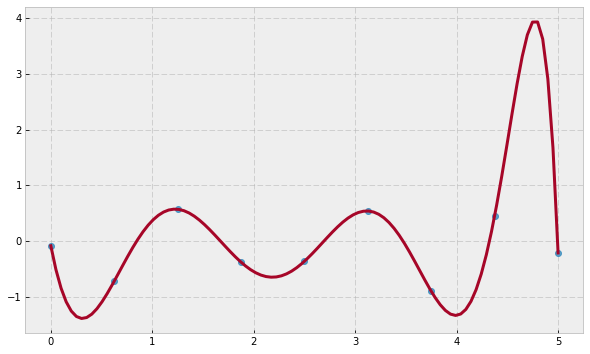

In [10]:
#피처 스케일
# 1. 학습세트에 대한 mu, sigma를 구한다.
X = np.array([ x_train**i for i in range(M+1) ])
mu = X.mean(axis=1).reshape(-1,1)
mu[0] = 0
X2 = X - mu
sigma = X2.std(axis=1).reshape(-1,1)
sigma[0] = 1

# 2. 구해진 mu, sigma로 그림 그리기 위한 X도메인에 대한 polynomial feature를 스케일한다.
X = np.array([ x**i for i in range(M+1) ]) 
if feautre_scale :
    X = (X - mu) / sigma
y = (w.reshape(-1,1) * X).sum(axis=0)

plt.plot(x_train, t_train, 'o', alpha=0.8)
plt.plot(x, y, lw=3, label="$M=${}".format(M))
plt.show()

In [1]:
%%html
<link href='https://fonts.googleapis.com/earlyaccess/notosanskr.css' rel='stylesheet' type='text/css'>
<!--https://github.com/kattergil/NotoSerifKR-Web/stargazers-->
<link href='https://cdn.rawgit.com/kattergil/NotoSerifKR-Web/5e08423b/stylesheet/NotoSerif-Web.css' rel='stylesheet' type='text/css'>
<!--https://github.com/Joungkyun/font-d2coding-->
<link href="http://cdn.jsdelivr.net/gh/joungkyun/font-d2coding/d2coding.css" rel="stylesheet" type="text/css">
<style>
    h1     { font-family: 'Noto Sans KR' !important; color:#348ABD !important;   }
    h2     { font-family: 'Noto Sans KR' !important; color:#467821 !important;   }
    h3, h4 { font-family: 'Noto Sans KR' !important; color:#A60628 !important;   }
    p:not(.navbar-text) { font-family: 'Noto Serif KR', 'Nanum Myeongjo'; font-size: 12pt; line-height: 200%;  text-indent: 10px; }
    li:not(.dropdown):not(.p-TabBar-tab):not(.p-MenuBar-item):not(.jp-DirListing-item):not(.p-CommandPalette-header):not(.p-CommandPalette-item):not(.jp-RunningSessions-item)
            { font-family: 'Noto Serif KR', 'Nanum Myeongjo'; font-size: 12pt; line-height: 200%; }
    table  { font-family: 'Noto Sans KR' !important;  font-size: 11pt !important; }           
    li > p  { text-indent: 0px; }
    li > ul { margin-top: 0px !important; }       
    sup { font-family: 'Noto Sans KR'; font-size: 9pt; } 
    code, pre  { font-family: D2Coding, 'D2 coding' !important; font-size: 12pt !important; line-height: 130% !important;}
    .code-body { font-family: D2Coding, 'D2 coding' !important; font-size: 12pt !important;}
    .ns        { font-family: 'Noto Sans KR'; font-size: 15pt;}
    .summary   {
                   font-family: 'Georgia'; font-size: 12pt; line-height: 200%; 
                   border-left:3px solid #FF0000; 
                   padding-left:20px; 
                   margin-top:10px;
                   margin-left:15px;
               }
    .green { color:#467821 !important; }
    .comment { font-family: 'Noto Sans KR'; font-size: 10pt; }
</style>